# Using OCR Bounding Boxes and Images to evaluate text confidence

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Corrupt JPEG data: bad Huffman code
/var/folders/pz/bsrlw1051zq7wv21r5cq1y280000gn/T/ipykernel_6547/1777855280.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


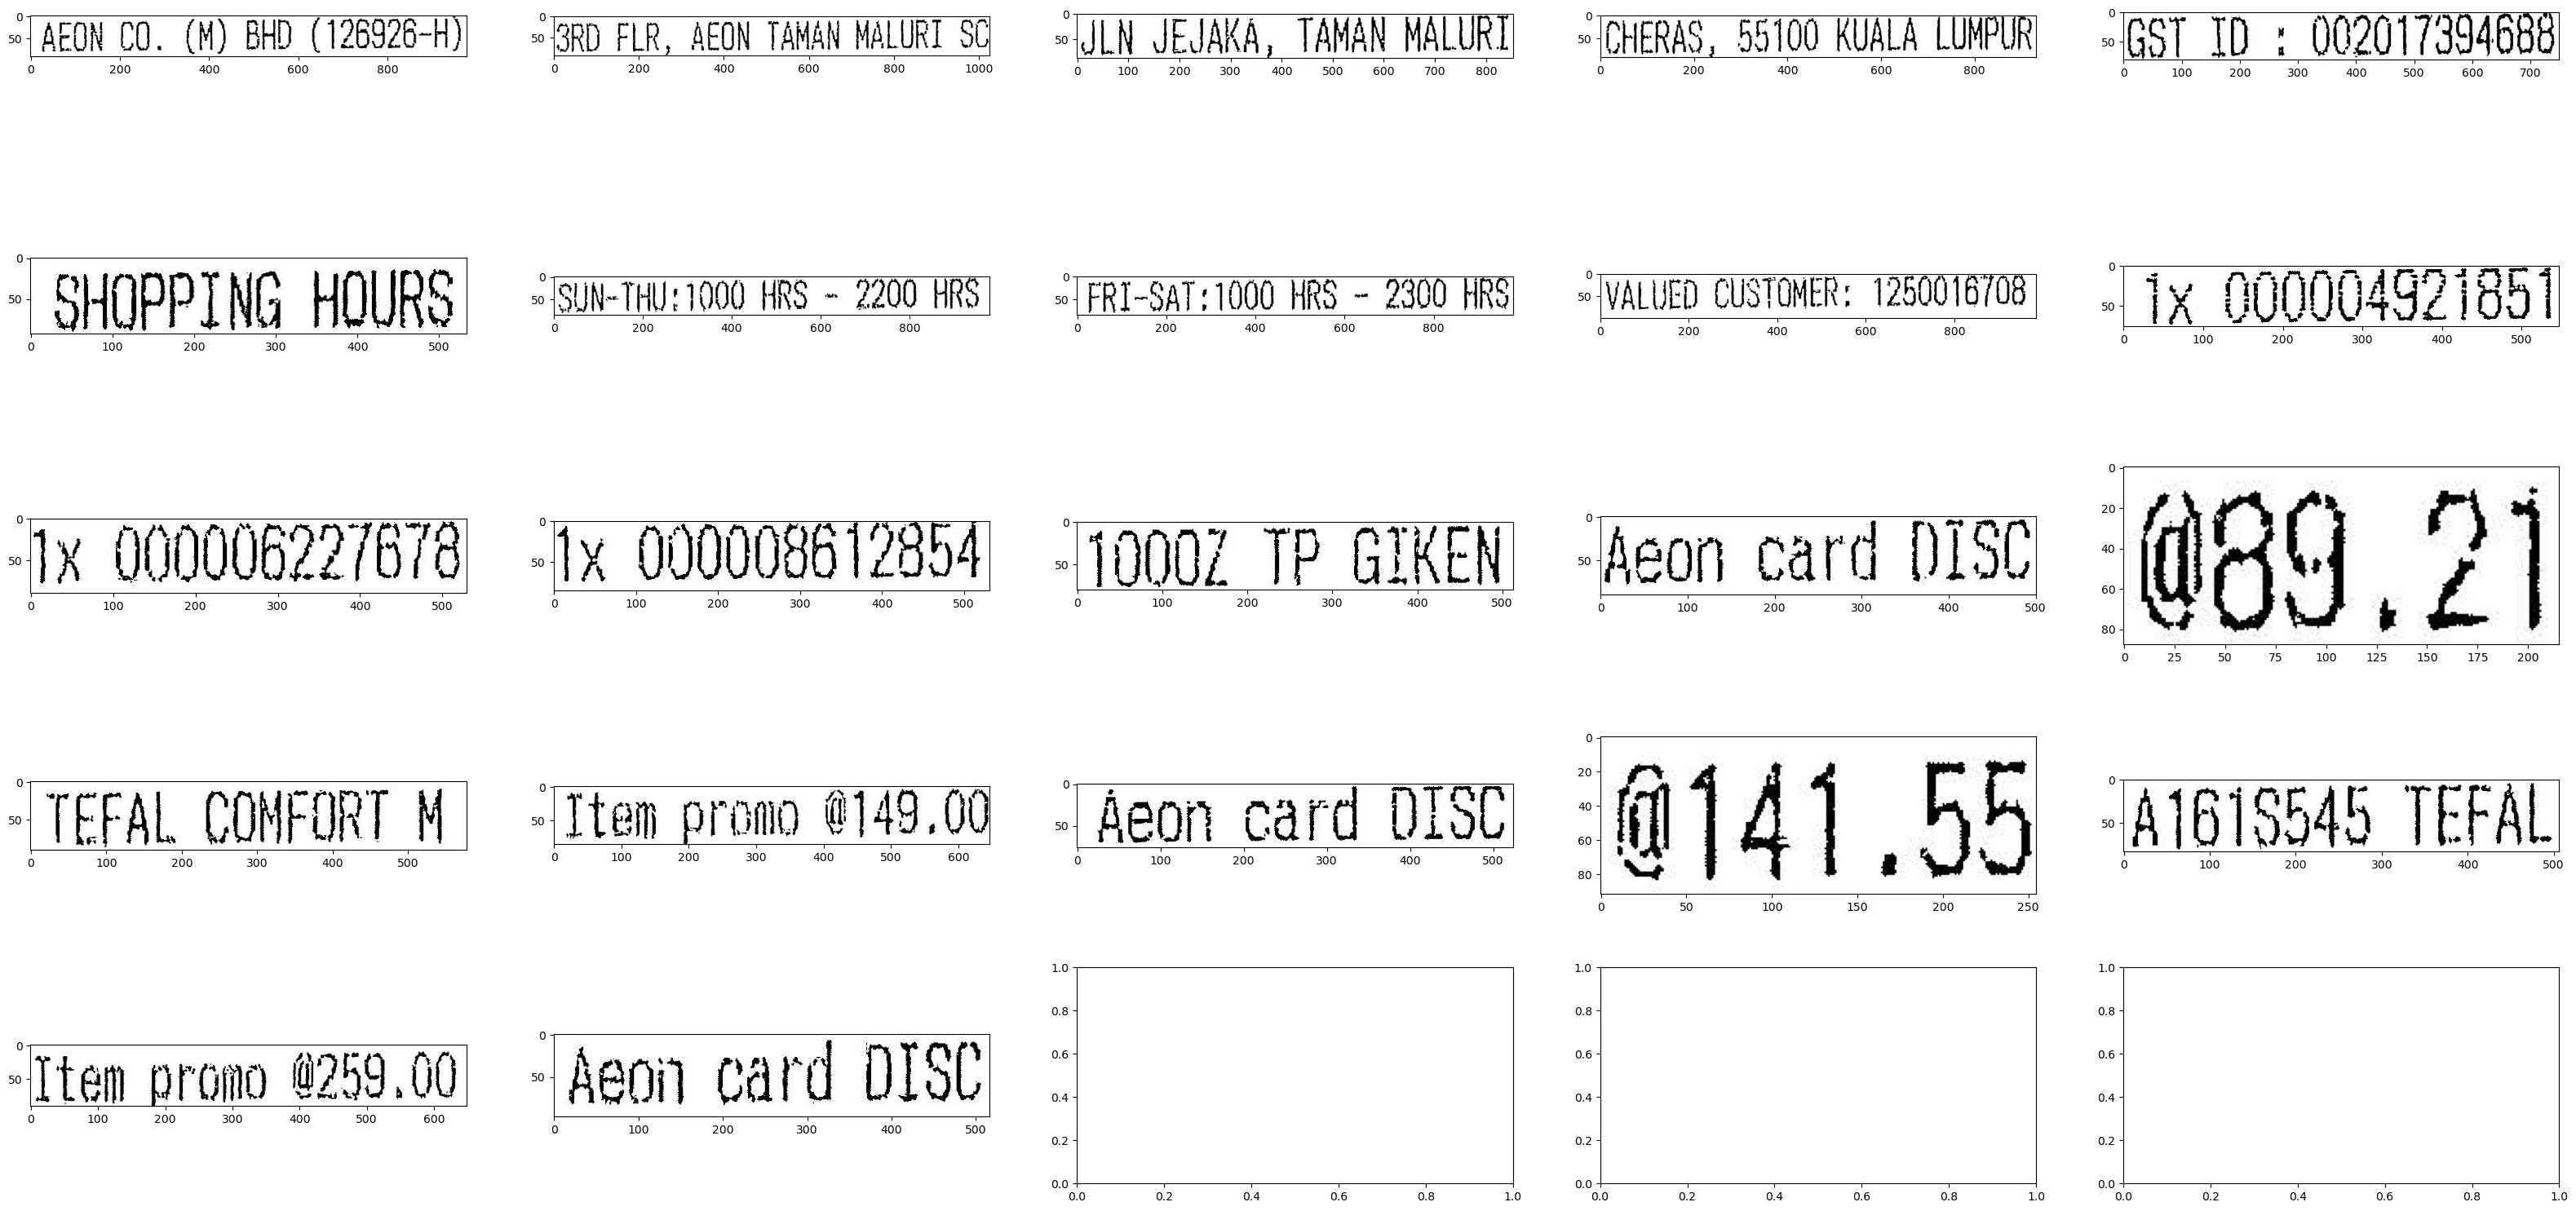

In [82]:
testfile = '00d0100894168'
img = cv2.imread(f'data/original/img/{testfile}.jpg')
imgdata = pd.read_csv(f"data/interim/ocr/{testfile}.csv")

fig, ax = plt.subplots(5,5,figsize=(40,20))
ctr = 0
for row in imgdata.iterrows():
    if int(row[1]['BB1']) < int(row[1]['BB3']) and int(row[1]['BB2']) < int(row[1]['BB6']):
        slc = img[int(row[1]['BB2']):int(row[1]['BB6'])+1, int(row[1]['BB1']):int(row[1]['BB3'])+1]
        if ctr < 25:
            ax[ctr//5][ctr%5].imshow(slc)
            ctr += 1
        if ctr == 22:
            break
fig.show()


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,517,97,-1.000000,NaN
1,2,1,1,0,0,0,17,7,489,76,-1.000000,NaN
2,3,1,1,1,0,0,17,7,489,76,-1.000000,NaN
3,4,1,1,1,1,0,17,7,489,76,-1.000000,NaN
4,5,1,1,1,1,1,17,15,137,68,23.044342,Ago
5,5,1,1,1,1,2,194,7,136,76,93.542290,card
6,5,1,1,1,1,3,369,9,137,71,95.353378,DISC


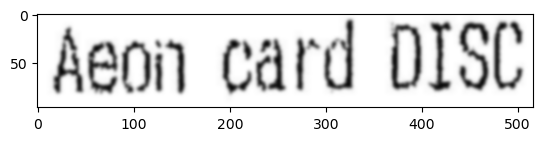

In [83]:
import pytesseract as pts

slc2 = cv2.GaussianBlur(slc, (9,9), 0)
text = pts.image_to_data(cv2.cvtColor(slc2, cv2.COLOR_BGR2RGB), output_type='data.frame')
plt.imshow(slc2)
text

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,517,97,-1.000000,NaN
1,2,1,1,0,0,0,17,9,489,76,-1.000000,NaN
2,3,1,1,1,0,0,17,9,489,76,-1.000000,NaN
3,4,1,1,1,1,0,17,9,489,76,-1.000000,NaN
4,5,1,1,1,1,1,17,17,137,68,68.667381,Aeon
5,5,1,1,1,1,2,194,9,136,76,95.773788,card
6,5,1,1,1,1,3,369,11,137,71,96.330627,DISC


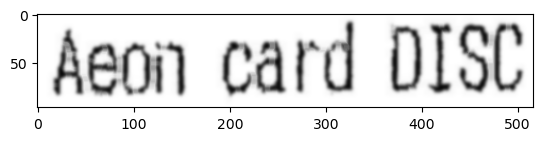

In [84]:
slc3 = 255 - slc2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
slc3 = cv2.morphologyEx(slc3, cv2.MORPH_CLOSE, kernel, iterations=2)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,5))
slc3 = 255 - cv2.morphologyEx(slc3, cv2.MORPH_CLOSE, kernel, iterations=0)
text = pts.image_to_data(cv2.cvtColor(slc3, cv2.COLOR_BGR2RGB), output_type='data.frame')
plt.imshow(slc3)
text